In [1]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

## Importar base de datos

In [2]:
path = 'C:/Users/Josh Guzman/Desktop/Delfin 2018/ENOE/2014/hogt2014_c.csv'
df_hogt2014 = pd.read_csv(path, low_memory = False, encoding='latin')
df_hogt2014.head()

,loc,mun,est,est_d,t_loc,cd_a,ent,d_sem,n_pro_viv,v_sel,...,r_def,d_dia,d_mes,d_anio,e_obs,p4_1,p4_2,inf,ur,fac
0,1,1,30,2,1,14,1,101,28,1,...,0,30,12,13,2,4,0,1,1,106
1,1,1,30,2,1,14,1,101,60,2,...,0,30,12,13,2,4,0,3,1,106
2,1,1,30,2,1,14,1,101,93,3,...,0,2,1,14,2,4,0,4,1,106
3,1,1,30,2,1,14,1,101,161,5,...,0,31,12,13,2,4,0,31,1,106
4,1,1,30,2,1,14,1,101,114,1,...,0,2,1,14,2,4,0,2,1,105


## Normalizar los datos

In [3]:
df_hogt2014 = sk.preprocessing.normalize(df_hogt2014, norm='l2', axis=1, copy=True)

In [4]:
#Crear un dataframe con los datos normalizados
df_hogt14_norm = pd.DataFrame(df_hogt2014)
df_hogt14_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.005079,0.005079,0.152357,0.010157,0.005079,0.071100,0.005079,0.512935,0.142200,0.005079,...,0.0,0.152357,0.060943,0.066021,0.010157,0.020314,0.0,0.005079,0.005079,0.538328
1,0.004903,0.004903,0.147089,0.009806,0.004903,0.068641,0.004903,0.495199,0.294178,0.009806,...,0.0,0.147089,0.058836,0.063739,0.009806,0.019612,0.0,0.014709,0.004903,0.519714
2,0.004733,0.004733,0.141997,0.009466,0.004733,0.066265,0.004733,0.478056,0.440190,0.014200,...,0.0,0.009466,0.004733,0.066265,0.009466,0.018933,0.0,0.018933,0.004733,0.501722
3,0.003922,0.003922,0.117656,0.007844,0.003922,0.054906,0.003922,0.396109,0.631421,0.019609,...,0.0,0.121578,0.047062,0.050984,0.007844,0.015687,0.0,0.121578,0.003922,0.415718
4,0.004529,0.004529,0.135870,0.009058,0.004529,0.063406,0.004529,0.457431,0.516308,0.004529,...,0.0,0.009058,0.004529,0.063406,0.009058,0.018116,0.0,0.009058,0.004529,0.475547


In [5]:
df_hogt14_norm.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
dtype: object

## Aplicar Metodo Elbow

Para determinar el numero de clusters a usar

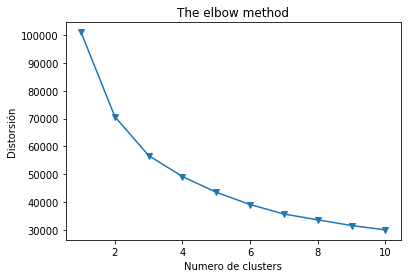

In [6]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    
    km.fit(df_hogt14_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='v')
plt.title('The elbow method')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

# Kmeans

In [7]:
km = KMeans(n_clusters = 3, 
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)

y_kmeans = km.fit_predict(df_hogt14_norm)

In [8]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

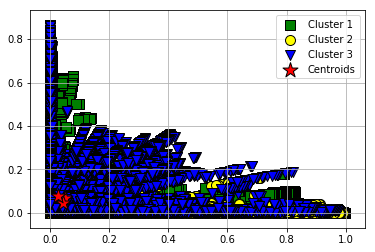

In [9]:
plt.scatter(df_hogt2014[y_kmeans == 0, 0], 
            df_hogt2014[y_kmeans == 0, 1], 
            s = 100, c = 'green',
            marker = 's', edgecolor = 'black',
            label = 'Cluster 1')

plt.scatter(df_hogt2014[y_kmeans == 1, 0], 
            df_hogt2014[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', 
            marker = 'o', edgecolor = 'black',
            label = 'Cluster 2')

plt.scatter(df_hogt2014[y_kmeans == 2, 0], 
            df_hogt2014[y_kmeans == 2, 1], 
            s = 100, c = 'blue', 
            marker = 'v', edgecolor = 'black',
            label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:,1], 
            s = 250, marker = '*',
            c = 'red', edgecolor = 'black',
            label = 'Centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

# Spectral Clustering

In [10]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [11]:
l = 100
df_hogt2014, y = np.indices((l, l))

In [12]:
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

In [13]:
circle1 = (df_hogt2014 - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (df_hogt2014 - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (df_hogt2014 - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (df_hogt2014 - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2


In [14]:
img = circle1 + circle2 + circle3 + circle4

In [15]:
mask = img.astype(bool)

In [16]:
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [17]:
graph = image.img_to_graph(img, mask=mask)

In [18]:
graph.data = np.exp(-graph.data / graph.data.std())

In [19]:
labels = spectral_clustering(graph, n_clusters=3, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

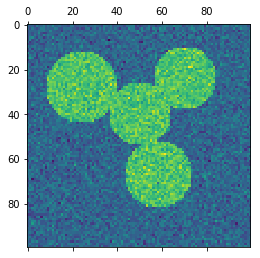

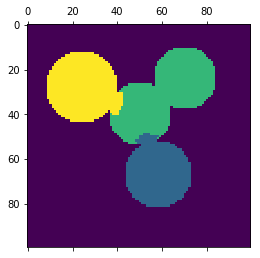

In [20]:
plt.matshow(img)
plt.matshow(label_im)

In [21]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

In [22]:
img += 1 + 0.2 * np.random.randn(*img.shape)

In [23]:
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

In [24]:
labels = spectral_clustering(graph, n_clusters=3, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

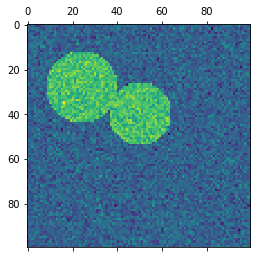

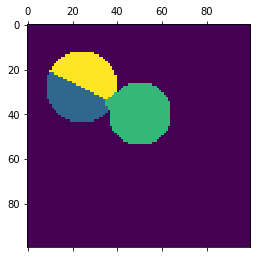

In [25]:
plt.matshow(img)
plt.matshow(label_im)

In [26]:
plt.show()